Import (à executer)

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer
from sklearn import preprocessing
from scipy.stats import pearsonr
import joblib

Visualisation des données 

Taille des caractéristiques (features) : (166315, 10)
Taille des étiquettes (labels) : (166315, 1)
Taille de X_train : (133052, 10)
Taille de X_test : (33263, 10)


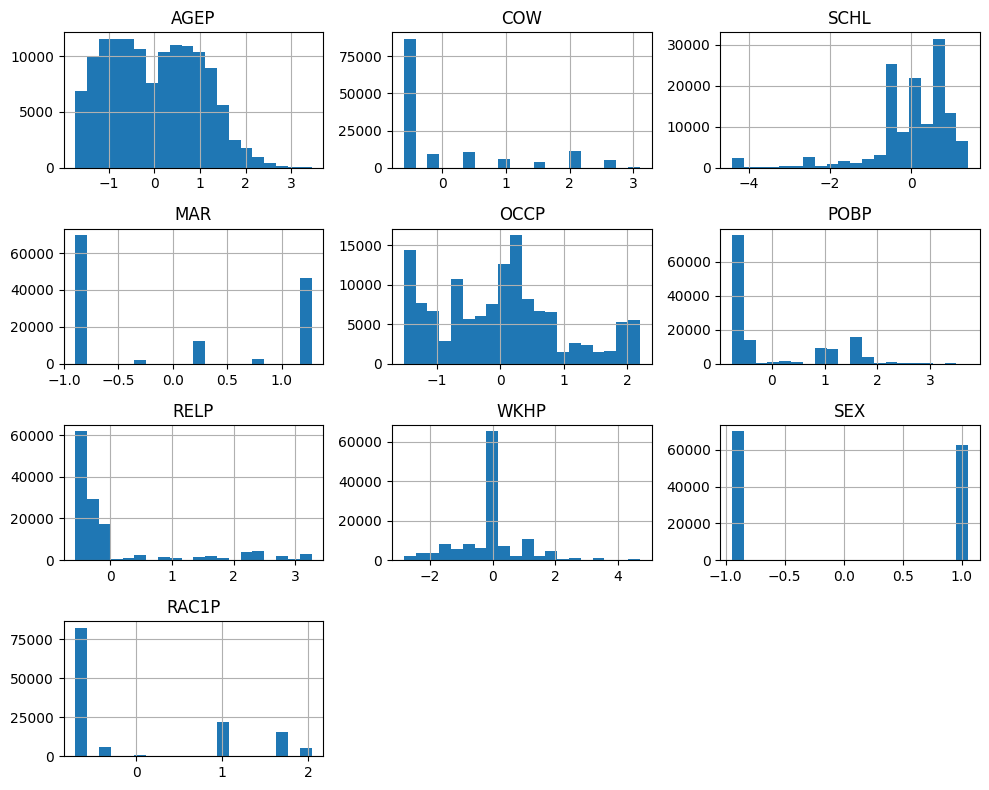

In [60]:

#Compréhension jeu de donées

features_file = "alt_acsincome_ca_features_85(1).csv"
labels_file = "alt_acsincome_ca_labels_85.csv"

df_feat = pd.read_csv(features_file)
df_lab = pd.read_csv(labels_file)
print(f"Taille des caractéristiques (features) : {df_feat.shape}")
print(f"Taille des étiquettes (labels) : {df_lab.shape}")


X_train, X_test, y_train, y_test = skmodel.train_test_split(
    df_feat, df_lab, test_size=0.2, shuffle=True, random_state=42
)

print(f"Taille de X_train : {X_train.shape}")
print(f"Taille de X_test : {X_test.shape}")

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
joblib.dump(scaler, 'scaler.joblib')

scaler_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
scaler_df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

Random Forest avec les hyperparametres par défaut 

In [3]:

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train.values.ravel())  
y_pred = rf_model.predict(X_test_scaled)

cv_scores = cross_val_score(rf_model, X_train_scaled, y_train.values.ravel(), cv=5, scoring='accuracy')
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne en validation croisée : {cv_scores.mean():.4f}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.4f}")

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))

importances = rf_model.feature_importances_
for feature, importance in zip(df_feat.columns, importances):
    print(f"{feature}: {importance:.4f}")



Scores de validation croisée : [0.81533952 0.81376123 0.81172492 0.81273957 0.81273957]
Précision moyenne en validation croisée : 0.8133
Précision du modèle : 0.8158

Rapport de classification :
              precision    recall  f1-score   support

       False       0.84      0.85      0.84     19594
        True       0.78      0.77      0.77     13669

    accuracy                           0.82     33263
   macro avg       0.81      0.81      0.81     33263
weighted avg       0.82      0.82      0.82     33263


Matrice de confusion :
[[16676  2918]
 [ 3210 10459]]
AGEP: 0.1710
COW: 0.0432
SCHL: 0.1278
MAR: 0.0317
OCCP: 0.2680
POBP: 0.0854
RELP: 0.0812
WKHP: 0.1382
SEX: 0.0212
RAC1P: 0.0323


AdaBoost avec les hyperparametres par défaut 

In [4]:

adaboost = AdaBoostClassifier()
adaboost.fit(X_train_scaled, y_train.values.ravel())
y_pred = adaboost.predict(X_test_scaled)

cv_scores = cross_val_score(adaboost, X_train_scaled, y_train.values.ravel(), cv=5, scoring='accuracy')
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne en validation croisée : {cv_scores.mean():.4f}")

print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("\n Class Stats :")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy : {accuracy:.2f}")


c:\Users\walid\Desktop\5A\app_supervise\app_sup\tp-supervise\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\walid\Desktop\5A\app_supervise\app_sup\tp-supervise\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\walid\Desktop\5A\app_supervise\app_sup\tp-supervise\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\walid\Desktop\5A\app_supervise\app_sup\tp-supervise\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R alg

Scores de validation croisée : [0.81150652 0.81052948 0.80939496 0.80443442 0.80755355]
Précision moyenne en validation croisée : 0.8087

Matrice de confusion :
[[16492  3102]
 [ 3248 10421]]

 Class Stats :
              precision    recall  f1-score   support

       False       0.84      0.84      0.84     19594
        True       0.77      0.76      0.77     13669

    accuracy                           0.81     33263
   macro avg       0.80      0.80      0.80     33263
weighted avg       0.81      0.81      0.81     33263


Accuracy : 0.81


Gradient Boosting avec les hyperparametres par défaut 

In [5]:


gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train.values.ravel())
y_pred_gb = gb_model.predict(X_test_scaled)

cv_scores = cross_val_score(gb_model, X_train_scaled, y_train.values.ravel(), cv=5, scoring='accuracy')
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne en validation croisée : {cv_scores.mean():.4f}")


print("\nMatrice de confusion (Gradient Boosting) :")
print(confusion_matrix(y_test, y_pred_gb))

print("\nRapport de classification (Gradient Boosting) :")
print(classification_report(y_test, y_pred_gb))

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"\nPrécision globale (Accuracy - Gradient Boosting) : {accuracy_gb:.2f}")


Scores de validation croisée : [0.81875916 0.81481342 0.81488162 0.8106351  0.81292747]
Précision moyenne en validation croisée : 0.8144

Matrice de confusion (Gradient Boosting) :
[[16653  2941]
 [ 3262 10407]]

Rapport de classification (Gradient Boosting) :
              precision    recall  f1-score   support

       False       0.84      0.85      0.84     19594
        True       0.78      0.76      0.77     13669

    accuracy                           0.81     33263
   macro avg       0.81      0.81      0.81     33263
weighted avg       0.81      0.81      0.81     33263


Précision globale (Accuracy - Gradient Boosting) : 0.81


Méthode de stacking avec les hyperparametres par défaut 


In [12]:

base_learners = [
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42)),
    ('adaboost', AdaBoostClassifier(random_state=42)),
]

meta_learner = LogisticRegression()
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)
stacking_clf.fit(X_train_scaled, y_train.values.ravel())
y_pred = stacking_clf.predict(X_test_scaled)
cv_scores = cross_val_score(stacking_clf, X_train_scaled, y_train.values.ravel(), cv=5, scoring='accuracy')
print(f"Scores de validation croisée : {cv_scores}")
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrécision globale (Accuracy) : {accuracy:.4f}")




c:\Users\walid\Desktop\5A\app_supervise\app_sup\tp-supervise\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\walid\Desktop\5A\app_supervise\app_sup\tp-supervise\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\walid\Desktop\5A\app_supervise\app_sup\tp-supervise\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\walid\Desktop\5A\app_supervise\app_sup\tp-supervise\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R alg

Scores de validation croisée : [0.82285521 0.81988651 0.81939121 0.81702368 0.81777527]

Matrice de confusion :
[[16801  2793]
 [ 3181 10488]]

Rapport de classification :
              precision    recall  f1-score   support

       False       0.84      0.86      0.85     19594
        True       0.79      0.77      0.78     13669

    accuracy                           0.82     33263
   macro avg       0.82      0.81      0.81     33263
weighted avg       0.82      0.82      0.82     33263


Précision globale (Accuracy) : 0.8204


GridSearch

In [54]:
#Voir fichier gridsearch.py

Nevada et Colorado test


In [17]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import joblib

nevada_features = pd.read_csv('acsincome_ne_features.csv')
nevada_labels = pd.read_csv('acsincome_ne_labelTP2.csv')
colorado_features = pd.read_csv('acsincome_co_features.csv')
colorado_labels = pd.read_csv('acsincome_co_label.csv')

print(f"Taille des caractéristiques (Nevada) : {nevada_features.shape}")
print(f"Taille des étiquettes (Nevada) : {nevada_labels.shape}")

print(f"Taille des caractéristiques (Colorado) : {colorado_features.shape}")
print(f"Taille des étiquettes (Colorado) : {colorado_labels.shape}")

scaler2 = joblib.load("scaler.joblib")
scaler_nevada = scaler2 
X_test_scaled_nevada = scaler_nevada.fit_transform(nevada_features)

scaler_colorado = scaler2
X_test_scaled_colorado = scaler_colorado.fit_transform(colorado_features)

models = [
    ("RandomForest", RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=12, n_estimators=100, random_state=42)),
    ("Adaboost", AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.15, n_estimators=150, random_state=42)),
    ("GradientBoosting", GradientBoostingClassifier(learning_rate=0.1, max_depth=7, n_estimators=150, subsample=0.9, random_state=42)),
    ("Stacking", StackingClassifier(
        estimators=[
            ('random_forest', RandomForestClassifier(max_depth=None, n_estimators=175, random_state=42)),
            ('adaboost', AdaBoostClassifier(learning_rate=1.0, n_estimators=150, random_state=42)),
            ('gradient_boosting', GradientBoostingClassifier(learning_rate=0.1, n_estimators=150, random_state=42))
        ],
        final_estimator=LogisticRegression(random_state=42),
        cv=5
    ))
]

for name, model in models:
    model.fit(X_train_scaled, y_train.values.ravel())

    y_pred_nevada = model.predict(X_test_scaled_nevada)
    print(f"\nÉvaluation sur le Nevada (modèle : {name})")
    accuracy = accuracy_score(nevada_labels, y_pred_nevada)
    print(f"\nPrécision globale (Accuracy) : {accuracy:.4f}")
    print("Matrice de confusion :")
    print(confusion_matrix(nevada_labels, y_pred_nevada))
    print("Rapport de classification :")
    print(classification_report(nevada_labels, y_pred_nevada))
    y_pred_colorado = model.predict(X_test_scaled_colorado)
    print(f"\nÉvaluation sur le Colorado (modèle : {name})")
    accuracy = accuracy_score(colorado_labels, y_pred_colorado)
    print(f"\nPrécision globale (Accuracy) : {accuracy:.4f}")
    print("Matrice de confusion :")
    print(confusion_matrix(colorado_labels, y_pred_colorado))
    print("Rapport de classification :")
    print(classification_report(colorado_labels, y_pred_colorado))


Taille des caractéristiques (Nevada) : (10785, 10)
Taille des étiquettes (Nevada) : (10785, 1)
Taille des caractéristiques (Colorado) : (31306, 10)
Taille des étiquettes (Colorado) : (31306, 1)

Évaluation sur le Nevada (modèle : RandomForest)

Précision globale (Accuracy) : 0.7498
Matrice de confusion :
[[5545 1872]
 [ 826 2542]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.87      0.75      0.80      7417
           1       0.58      0.75      0.65      3368

    accuracy                           0.75     10785
   macro avg       0.72      0.75      0.73     10785
weighted avg       0.78      0.75      0.76     10785


Évaluation sur le Colorado (modèle : RandomForest)

Précision globale (Accuracy) : 0.7759
Matrice de confusion :
[[14949  3385]
 [ 3631  9341]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     18334
           1       0.73      0

c:\Users\walid\Desktop\5A\app_supervise\app_sup\tp-supervise\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Évaluation sur le Nevada (modèle : Adaboost)

Précision globale (Accuracy) : 0.7459
Matrice de confusion :
[[5506 1911]
 [ 829 2539]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      7417
           1       0.57      0.75      0.65      3368

    accuracy                           0.75     10785
   macro avg       0.72      0.75      0.73     10785
weighted avg       0.78      0.75      0.75     10785


Évaluation sur le Colorado (modèle : Adaboost)

Précision globale (Accuracy) : 0.7681
Matrice de confusion :
[[14820  3514]
 [ 3745  9227]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.80      0.81      0.80     18334
           1       0.72      0.71      0.72     12972

    accuracy                           0.77     31306
   macro avg       0.76      0.76      0.76     31306
weighted avg       0.77      0.77      0.77     31306


Évaluation su

c:\Users\walid\Desktop\5A\app_supervise\app_sup\tp-supervise\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\walid\Desktop\5A\app_supervise\app_sup\tp-supervise\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\walid\Desktop\5A\app_supervise\app_sup\tp-supervise\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\walid\Desktop\5A\app_supervise\app_sup\tp-supervise\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R alg


Évaluation sur le Nevada (modèle : Stacking)

Précision globale (Accuracy) : 0.7503
Matrice de confusion :
[[5561 1856]
 [ 837 2531]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      7417
           1       0.58      0.75      0.65      3368

    accuracy                           0.75     10785
   macro avg       0.72      0.75      0.73     10785
weighted avg       0.78      0.75      0.76     10785


Évaluation sur le Colorado (modèle : Stacking)

Précision globale (Accuracy) : 0.7784
Matrice de confusion :
[[15125  3209]
 [ 3729  9243]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     18334
           1       0.74      0.71      0.73     12972

    accuracy                           0.78     31306
   macro avg       0.77      0.77      0.77     31306
weighted avg       0.78      0.78      0.78     31306



4. Interpretabilité et Equite


4.1 Interpretabilité 

Visualisation de la correlation entre les features et les labels

AGEP:0.26509767457995687
COW:0.05194124297907909
SCHL:0.35096229243314303
MAR:-0.2641929859659228
OCCP:-0.3434208604896821
POBP:-0.08850492778633365
RELP:-0.22742092393382027
WKHP:0.33778088205169465
SEX:-0.12046287549937569
RAC1P:-0.10071497882222966


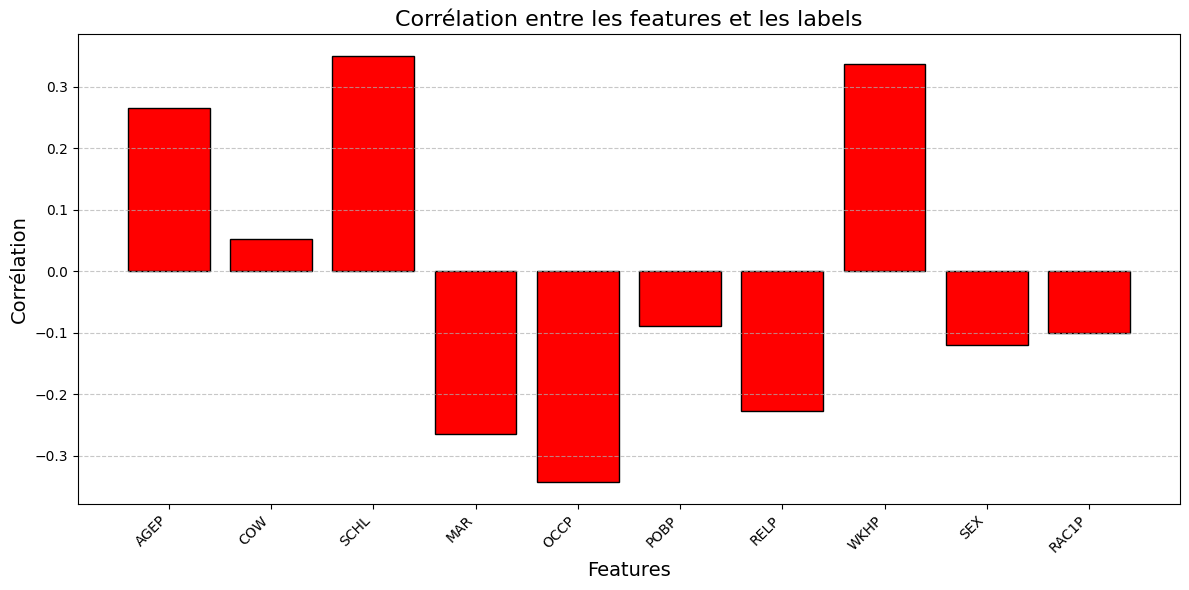

In [4]:
import pandas as pd
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy import ravel

features_file = "alt_acsincome_ca_features_85(1).csv"
labels_file = "alt_acsincome_ca_labels_85.csv"

df_feat = pd.read_csv(features_file)
df_lab = pd.read_csv(labels_file)

X_train, X_test, y_train, y_test = train_test_split(
    df_feat, df_lab, test_size=0.2, shuffle=True, random_state=42
)
y_train_ravel = ravel(y_train)

features = df_feat.columns.tolist()

corr_tab = []
for f in features:
    corr, p_value = pearsonr(X_train[f], y_train_ravel)
    corr_tab.append(corr)

for feature, corr_value in zip(features, corr_tab):
    print(str(feature) +":" + str(corr_value))

plt.figure(figsize=(12, 6))
plt.bar(features, corr_tab, color='red', edgecolor='black')
plt.title("Corrélation entre les features et les labels", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Corrélation", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Entrainement des meilleures modeles et affichage de la correlation entre les features et les labels 

In [61]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from numpy import ravel
from scipy.stats import pearsonr

models = [
    ("RandomForest", RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=12, n_estimators=100, random_state=42)),
    ("Adaboost", AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.15, n_estimators=150, random_state=42)),
    ("GradientBoosting", GradientBoostingClassifier(learning_rate=0.1, max_depth=7, n_estimators=150, subsample=0.9, random_state=42)),
    ("Stacking", StackingClassifier(
        estimators=[
            ('random_forest', RandomForestClassifier(max_depth=None, n_estimators=175, random_state=42)),
            ('adaboost', AdaBoostClassifier(learning_rate=1.0, n_estimators=150, random_state=42)),
            ('gradient_boosting', GradientBoostingClassifier(learning_rate=0.1, n_estimators=150, random_state=42))
        ],
        final_estimator=LogisticRegression(random_state=42),
        cv=5
    ))
]

corr_tab_ada = []
corr_tab_rf = []
corr_tab_gb = []
corr_tab_stack = []

for nom, model in models:
    y_train_ravel = ravel(y_train)
    model_to_train = model
    model_to_train.fit(X_train, y_train_ravel)
    y_pred_train = model_to_train.predict(X_train)

    y_pred_train_numeric = y_pred_train.astype(int)
    for f in features: 
        corr, _ = pearsonr(X_train[f], y_pred_train_numeric)

        if nom == "RandomForest":
            corr_tab_rf.append(corr)
        elif nom == "Adaboost":
            corr_tab_ada.append(corr)
        elif nom == "GradientBoosting":
            corr_tab_gb.append(corr)
        elif nom == "Stacking":
            corr_tab_stack.append(corr)

print("Corrélations pour RandomForest:\n")
for feature, corr_value in zip(features, corr_tab_rf):
    print(str(feature) +":" + str(corr_value))
print("Corrélations pour AdaBoost:\n")
for feature, corr_value in zip(features, corr_tab_ada):
    print(str(feature) +":" + str(corr_value))
print("Corrélations pour GradientBoosting:\n")
for feature, corr_value in zip(features, corr_tab_gb):
    print(str(feature) +":" + str(corr_value))
print("Corrélations pour Stacking:\n")
for feature, corr_value in zip(features, corr_tab_stack):
    print(str(feature) +":" + str(corr_value))


c:\Users\walid\Desktop\5A\app_supervise\app_sup\tp-supervise\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\walid\Desktop\5A\app_supervise\app_sup\tp-supervise\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\walid\Desktop\5A\app_supervise\app_sup\tp-supervise\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\walid\Desktop\5A\app_supervise\app_sup\tp-supervise\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R alg

Corrélations pour RandomForest:

AGEP:0.2921035131514733
COW:0.06333063888083924
SCHL:0.44605791516854326
MAR:-0.30365921547786084
OCCP:-0.4513793090300542
POBP:-0.1312056428690757
RELP:-0.26493701965224303
WKHP:0.3907256004241823
SEX:-0.13787915966819742
RAC1P:-0.13363533141799977
Corrélations pour AdaBoost:

AGEP:0.2806761389620214
COW:0.06993386916565071
SCHL:0.468589255810299
MAR:-0.30283597813591073
OCCP:-0.4982109544238641
POBP:-0.12501043347801283
RELP:-0.28442274988266625
WKHP:0.412410531464239
SEX:-0.13923183211353657
RAC1P:-0.12067609385642847
Corrélations pour GradientBoosting:

AGEP:0.29559681129444304
COW:0.063898216525802
SCHL:0.4408061699188326
MAR:-0.3004844054132041
OCCP:-0.4449863092726858
POBP:-0.1282686819930162
RELP:-0.26321217213695414
WKHP:0.3904124049388317
SEX:-0.13819816984349154
RAC1P:-0.13052097037768884
Corrélations pour Stacking:

AGEP:0.2883023062621289
COW:0.060959163575380844
SCHL:0.44049937405969003
MAR:-0.30047725521650837
OCCP:-0.44644025950334976
PO

Affichage graphique 

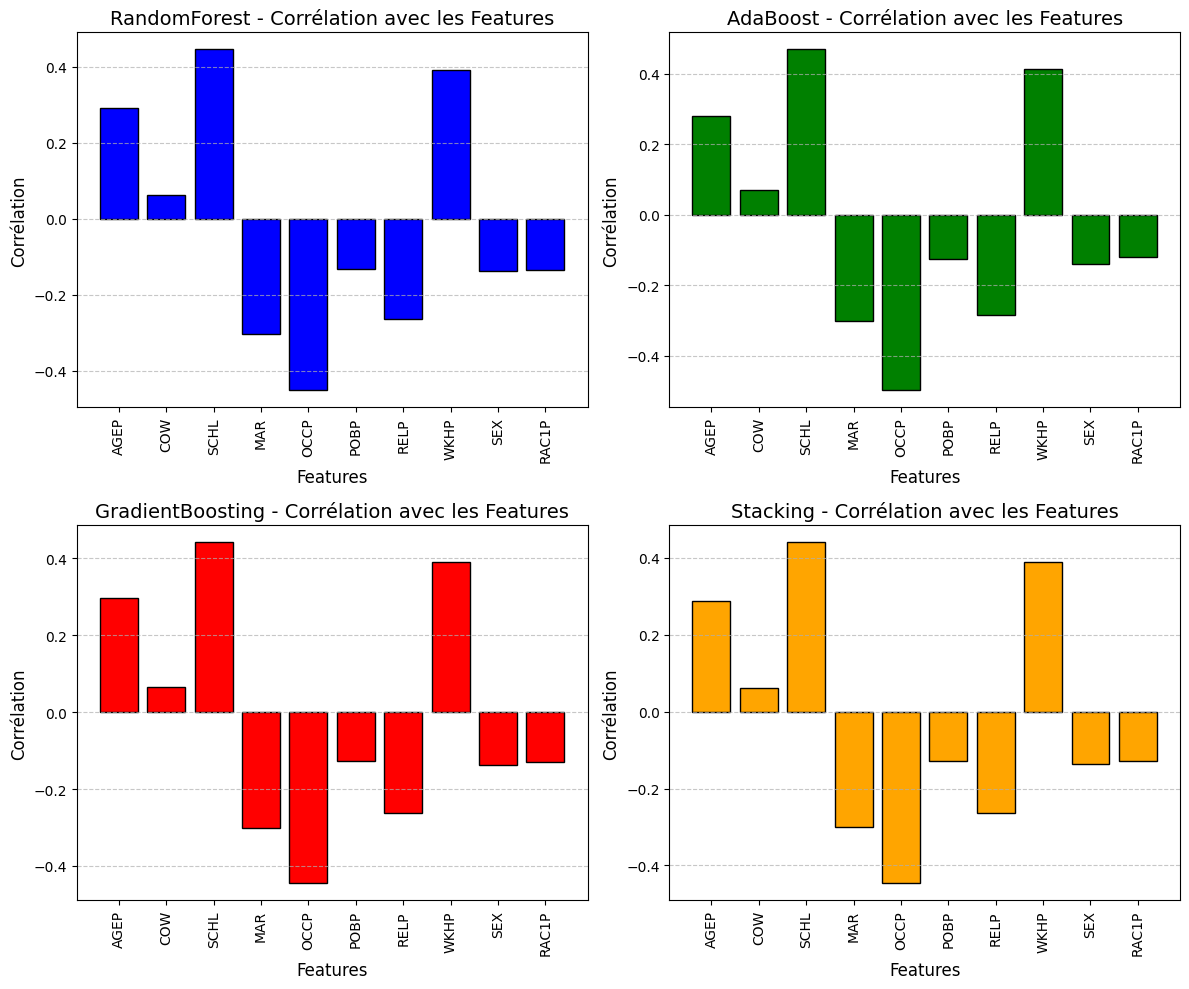

In [43]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.bar(range(len(corr_tab_rf)), corr_tab_rf, color='blue', edgecolor='black')
plt.title("RandomForest - Corrélation avec les Features", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Corrélation", fontsize=12)
plt.xticks(range(len(corr_tab_rf)), features, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 2)
plt.bar(range(len(corr_tab_ada)), corr_tab_ada, color='green', edgecolor='black')
plt.title("AdaBoost - Corrélation avec les Features", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Corrélation", fontsize=12)
plt.xticks(range(len(corr_tab_ada)), features, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 3)
plt.bar(range(len(corr_tab_gb)), corr_tab_gb, color='red', edgecolor='black')
plt.title("GradientBoosting - Corrélation avec les Features", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Corrélation", fontsize=12)
plt.xticks(range(len(corr_tab_gb)), features, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 4)
plt.bar(range(len(corr_tab_stack)), corr_tab_stack, color='orange', edgecolor='black')
plt.title("Stacking - Corrélation avec les Features", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Corrélation", fontsize=12)
plt.xticks(range(len(corr_tab_stack)), features, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Affichage grpahique des corrélations du modele apres entrainemenet - correlations entre feature et labels ava,t entrainement

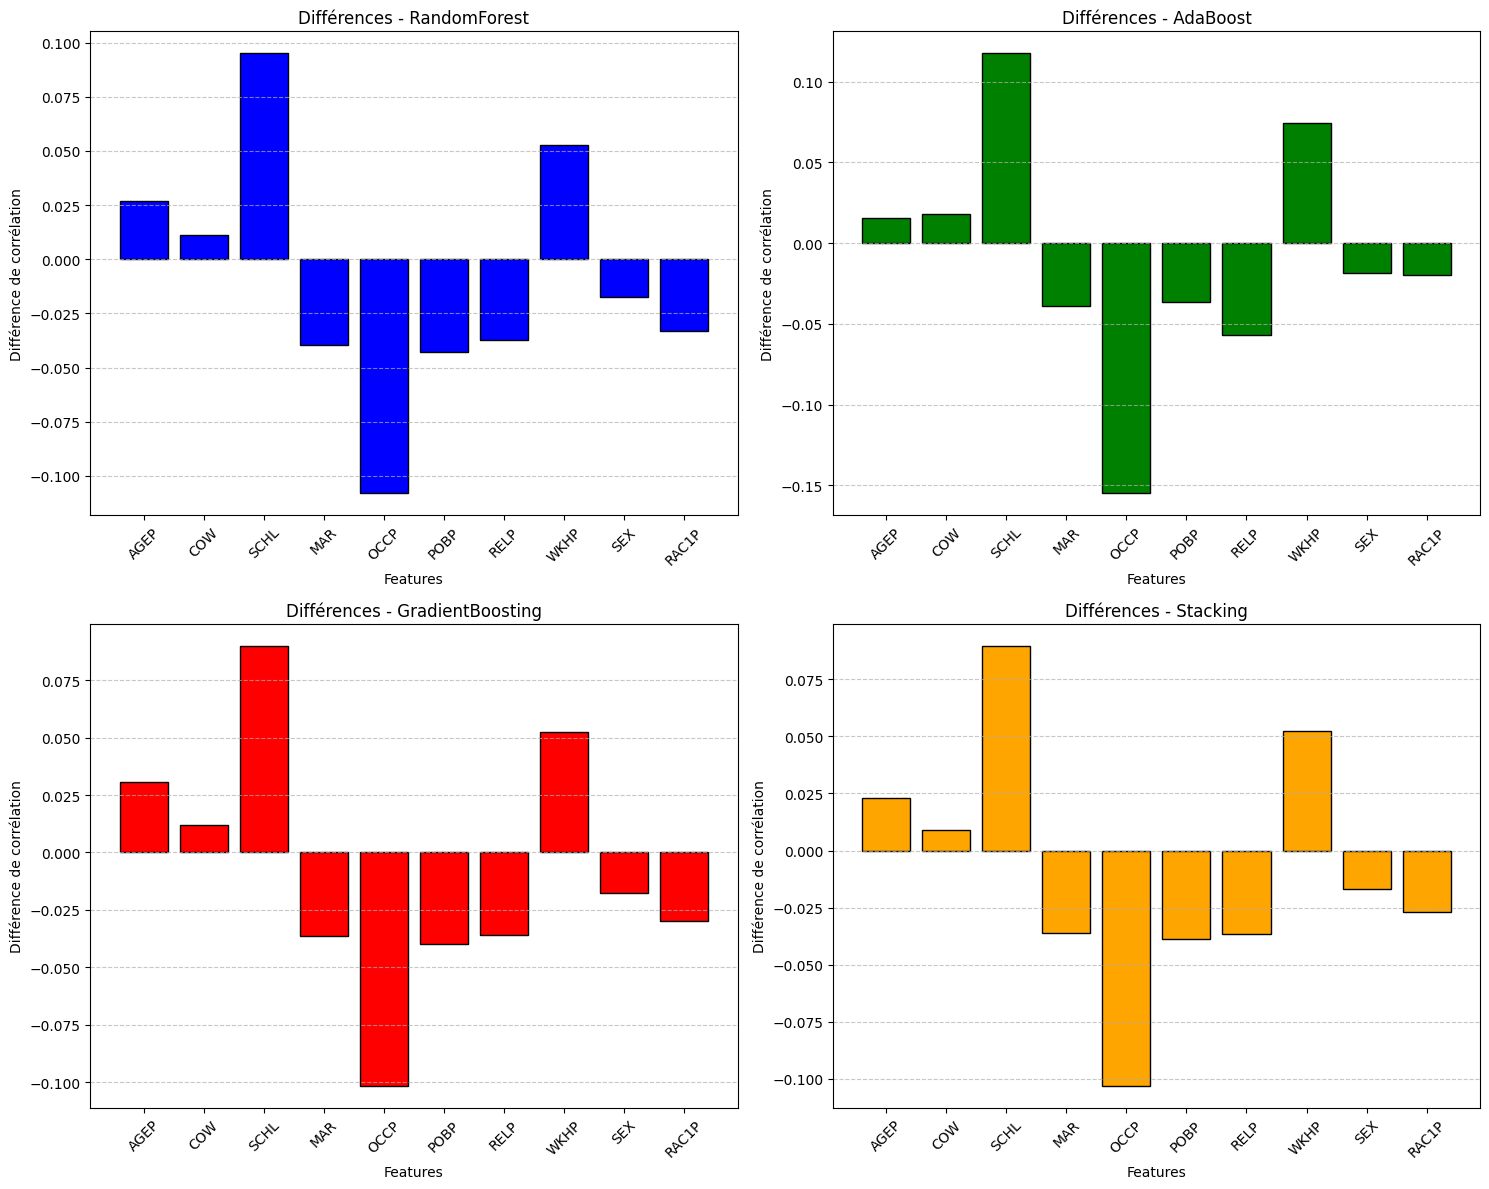

In [44]:

import matplotlib.pyplot as plt

corr_data = [
    [corr_tab, "Initiale"],  
    [corr_tab_rf, "RandomForest"],
    [corr_tab_ada, "Adaboost"],
    [corr_tab_gb, "GradientBoosting"],
    [corr_tab_stack, "Stacking"]
]

plt.figure(figsize=(15, 12))

# Premier graphique (RandomForest)
plt.subplot(2, 2, 1)  
differences_rf = [corr_tab_rf[i] - corr_data[0][0][i] for i in range(len(features))]
plt.bar(features, differences_rf, color='blue', edgecolor='black')
plt.title("Différences - RandomForest")
plt.xlabel("Features")
plt.ylabel("Différence de corrélation")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Deuxième graphique (AdaBoost)
plt.subplot(2, 2, 2)  
differences_ada = [corr_tab_ada[i] - corr_data[0][0][i] for i in range(len(features))]
plt.bar(features, differences_ada, color='green', edgecolor='black')
plt.title("Différences - AdaBoost")
plt.xlabel("Features")
plt.ylabel("Différence de corrélation")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Troisième graphique (GradientBoosting)
plt.subplot(2, 2, 3) 
differences_gb = [corr_tab_gb[i] - corr_data[0][0][i] for i in range(len(features))]
plt.bar(features, differences_gb, color='red', edgecolor='black')
plt.title("Différences - GradientBoosting")
plt.xlabel("Features")
plt.ylabel("Différence de corrélation")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Quatrième graphique (Stacking)
plt.subplot(2, 2, 4)  
differences_stack = [corr_tab_stack[i] - corr_data[0][0][i] for i in range(len(features))]
plt.bar(features, differences_stack, color='orange', edgecolor='black')
plt.title("Différences - Stacking")
plt.xlabel("Features")
plt.ylabel("Différence de corrélation")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Calcul des permuatations importance 

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from numpy import ravel
import matplotlib.pyplot as plt

models = [
    ("RandomForest", RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=12, n_estimators=100, random_state=42)),
    ("Adaboost", AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.15, n_estimators=150, random_state=42)),
    ("GradientBoosting", GradientBoostingClassifier(learning_rate=0.1, max_depth=7, n_estimators=150, subsample=0.9, random_state=42)),
    ("Stacking", StackingClassifier(
        estimators=[
            ('random_forest', RandomForestClassifier(max_depth=None, n_estimators=175, random_state=42)),
            ('adaboost', AdaBoostClassifier(learning_rate=1.0, n_estimators=150, random_state=42)),
            ('gradient_boosting', GradientBoostingClassifier(learning_rate=0.1, n_estimators=150, random_state=42))
        ],
        final_estimator=LogisticRegression(random_state=42),
        cv=5
    ))
]

feature_importances = {}

for nom, model in models:
    y_train_ravel = ravel(y_train)
    model_to_train = model
    model_to_train.fit(X_train, y_train_ravel)

    result = permutation_importance(model_to_train, X_test, y_test, n_repeats=10, random_state=42)
    feature_importances[nom] = result.importances_mean




Affichage graphique

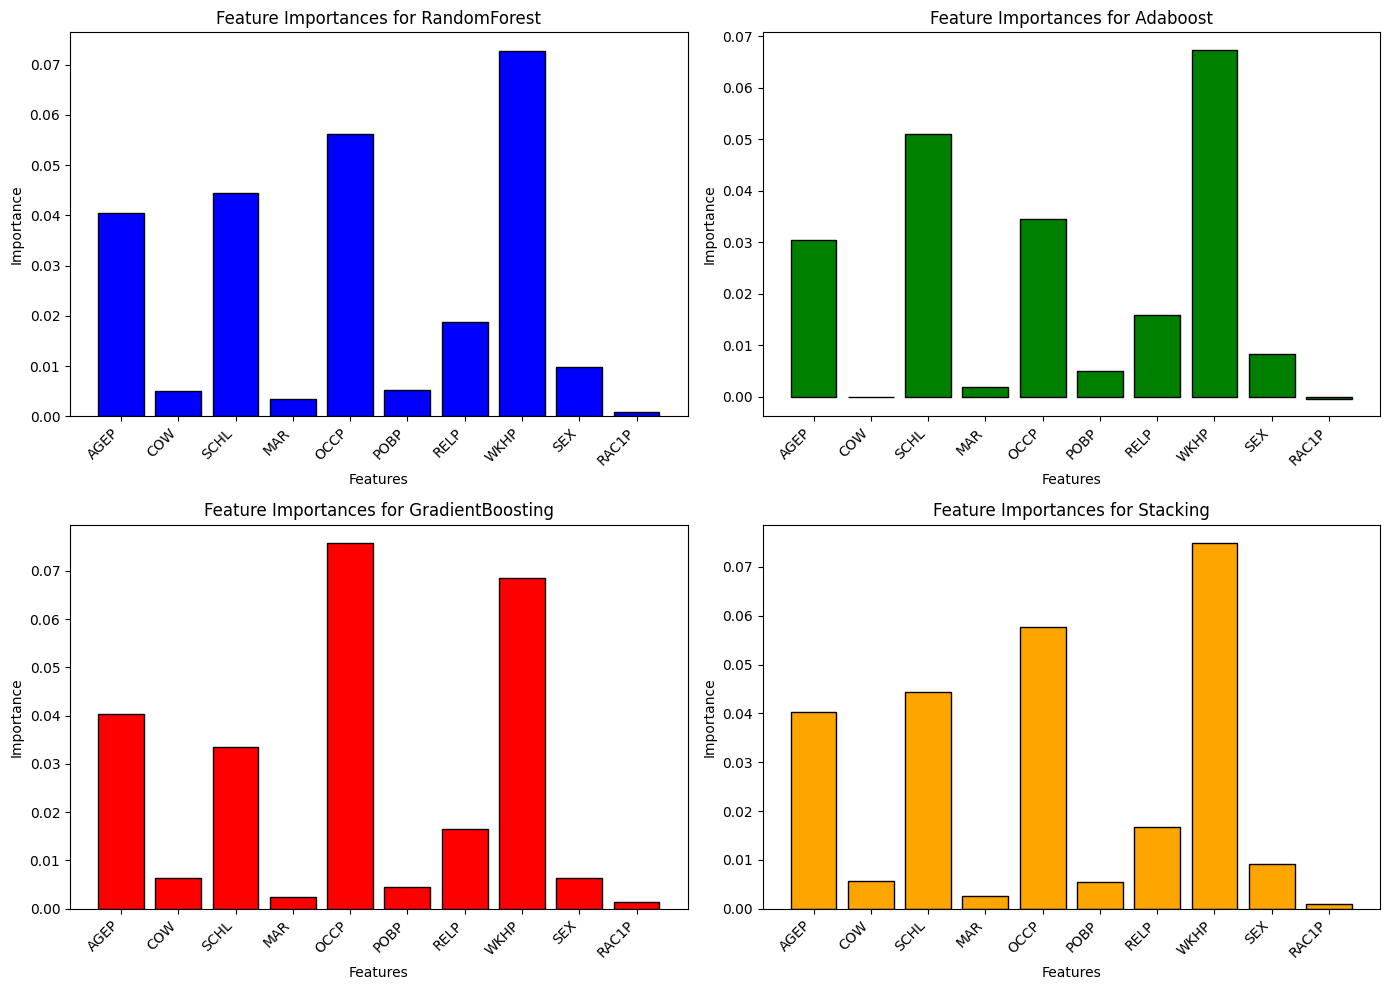

In [10]:
model_colors = {
    "RandomForest": "blue",
    "Adaboost": "green",
    "GradientBoosting": "red",
    "Stacking": "orange"
}

plt.figure(figsize=(14, 10))


plot_number = 1

for nom, importances in feature_importances.items():
    plt.subplot(2, 2, plot_number)  
    plt.bar(features, importances, color=model_colors[nom], edgecolor='black')
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.title(f"Feature Importances for {nom}")
    plt.xticks(rotation=45, ha='right')
    plot_number += 1  

plt.tight_layout()
plt.show()


Inférence à la main, prendre des echantillons au hasard et analyser le resultat


In [58]:
import numpy as np
import pandas as pd

model = RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=12, n_estimators=100, random_state=42)
model.fit(X_train, y_train)
random_indices = np.random.choice(X_test.index, size=3, replace=False)
random_samples = X_test.loc[random_indices]
random_targets = y_test.loc[random_indices]  
predictions = model.predict(random_samples)

importances = model.feature_importances_
features = random_samples.columns
for i, (index, sample) in enumerate(random_samples.iterrows()):
    print(f"Échantillon {i+1} (Index {index}):")
    print(sample.to_dict())  
    print(f"Cible réelle: {random_targets.loc[index]}")
    print(f"Prédiction du modèle: {predictions[i]}")
    
    sorted_importances = sorted(
        zip(features, importances), key=lambda x: x[1], reverse=True
    )
    for feature, importance in sorted_importances:
        print(f"- {feature}: valeur = {sample[feature]}")
    print("\n" + "-"*50 + "\n")


c:\Users\walid\Desktop\5A\app_supervise\app_sup\tp-supervise\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Échantillon 1 (Index 72325):
{'AGEP': 28.0, 'COW': 1.0, 'SCHL': 20.0, 'MAR': 5.0, 'OCCP': 6600.0, 'POBP': 6.0, 'RELP': 2.0, 'WKHP': 40.0, 'SEX': 1.0, 'RAC1P': 1.0}
Cible réelle: PINCP    True
Name: 72325, dtype: bool
Prédiction du modèle: False
- OCCP: valeur = 6600.0
- WKHP: valeur = 40.0
- SCHL: valeur = 20.0
- AGEP: valeur = 28.0
- RELP: valeur = 2.0
- POBP: valeur = 6.0
- COW: valeur = 1.0
- MAR: valeur = 5.0
- SEX: valeur = 1.0
- RAC1P: valeur = 1.0

--------------------------------------------------

Échantillon 2 (Index 13677):
{'AGEP': 42.0, 'COW': 1.0, 'SCHL': 16.0, 'MAR': 5.0, 'OCCP': 6520.0, 'POBP': 6.0, 'RELP': 0.0, 'WKHP': 50.0, 'SEX': 1.0, 'RAC1P': 1.0}
Cible réelle: PINCP    False
Name: 13677, dtype: bool
Prédiction du modèle: True
- OCCP: valeur = 6520.0
- WKHP: valeur = 50.0
- SCHL: valeur = 16.0
- AGEP: valeur = 42.0
- RELP: valeur = 0.0
- POBP: valeur = 6.0
- COW: valeur = 1.0
- MAR: valeur = 5.0
- SEX: valeur = 1.0
- RAC1P: valeur = 1.0

----------------------------

Taux sur les revenus entre les femmes et les hommes

In [17]:
X_train['income'] = y_train.values


rate = X_train['income'].mean()

male_rate = X_train[X_train['SEX'] == 1]['income'].mean()  
female_rate = X_train[X_train['SEX'] == 2]['income'].mean()  
print("Taux global d'individus ayant un revenu > 50 000 $:", rate)
print("Taux d'individus masculins ayant un revenu > 50 000 $:", male_rate)
print("Taux d'individus féminins ayant un revenu > 50 000 $:", female_rate)


Taux global d'individus ayant un revenu > 50 000 $: 0.40986982533144933
Taux d'individus masculins ayant un revenu > 50 000 $: 0.46594941218382613
Taux d'individus féminins ayant un revenu > 50 000 $: 0.3472811998027896


Entrainement des meilleures modeles 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import joblib


gender_column = df_feat['SEX']
gender_column = gender_column.replace({1: 0, 2: 1})  

models = [
    ("RandomForest", RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=12, n_estimators=100, random_state=42)),
    ("Adaboost", AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.15, n_estimators=150, random_state=42)),
    ("GradientBoosting", GradientBoostingClassifier(learning_rate=0.1, max_depth=7, n_estimators=150, subsample=0.9, random_state=42)),
    ("Stacking", StackingClassifier(
        estimators=[
            ('random_forest', RandomForestClassifier(max_depth=None, n_estimators=175, random_state=42)),
            ('adaboost', AdaBoostClassifier(learning_rate=1.0, n_estimators=150, random_state=42)),
            ('gradient_boosting', GradientBoostingClassifier(learning_rate=0.1, n_estimators=150, random_state=42))
        ],
        final_estimator=LogisticRegression(random_state=42),
        cv=5
    ))
]

predictions = {}

for name, model in models:
    model.fit(X_train_scaled, y_train)
    predictions[name] = model.predict(X_test_scaled)




Separation homme/femme et calcul des métriques 

In [55]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

gender_column = df_feat['SEX'].replace({1: 0, 2: 1})  # 0 pour homme, 1 pour femme
results = []
confusion_matrices = {}

for name, model in models:
    y_pred = predictions[name]
    for gender in [0, 1]:  # 0 pour hommes, 1 pour femmes
        gender_filter = (gender_column.iloc[X_test.index] == gender)
        y_true_gender, y_pred_gender = y_test[gender_filter], y_pred[gender_filter]
        cm = confusion_matrix(y_true_gender, y_pred_gender)
        confusion_matrices[(name, 'Homme' if gender == 0 else 'Femme')] = cm

        TP, FN, FP, TN = cm.ravel() 
        results.append({
            'Modèle': name,
            'Sexe': 'Homme' if gender == 0 else 'Femme',
            'Statistical Parity': (np.sum(y_pred_gender == 1) / len(y_pred_gender)) - (np.sum(y_pred == 1) / len(y_pred)),
            'Equal Opportunity': TP / (TP + FN),
            'Predictive Equality': FP / (FP + TN)
        })

results_df = pd.DataFrame(results)
print("Métriques calculées pour chaque modèle et genre :\n")
print(results_df)
print("\nMatrices de confusion pour chaque modèle et genre :\n")
for (model, gender), cm in confusion_matrices.items():
    print(f"Modèle: {model}, Sexe: {gender}\nMatrice de confusion:\n{cm}\n")


Métriques calculées pour chaque modèle et genre :

             Modèle   Sexe  Statistical Parity  Equal Opportunity  \
0      RandomForest  Homme            0.062971           0.825243   
1      RandomForest  Femme           -0.071135           0.881399   
2          Adaboost  Homme            0.063677           0.822604   
3          Adaboost  Femme           -0.071933           0.877446   
4  GradientBoosting  Homme            0.063099           0.827037   
5  GradientBoosting  Femme           -0.071279           0.882882   
6          Stacking  Homme            0.065627           0.826720   
7          Stacking  Femme           -0.074136           0.886242   

   Predictive Equality  
0             0.196376  
1             0.276132  
2             0.223433  
3             0.319215  
4             0.180705  
5             0.256317  
6             0.191846  
7             0.279586  

Matrices de confusion pour chaque modèle et genre :

Modèle: RandomForest, Sexe: Homme
Matrice de con

Dataset préparé pour l'entrainement sans le feature SEX

In [48]:
features_file = "alt_acsincome_ca_features_85(1).csv"
labels_file = "alt_acsincome_ca_labels_85.csv"

df_feat = pd.read_csv(features_file)
df_lab = pd.read_csv(labels_file)

print(f"Taille des caractéristiques (features) : {df_feat.shape}")
print(f"Taille des étiquettes (labels) : {df_lab.shape}")

X_train, X_test, y_train, y_test = train_test_split(df_feat, df_lab, test_size=0.2, shuffle=True, random_state=42)

print(f"Taille de X_train : {X_train.shape}")
print(f"Taille de X_test : {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Taille des caractéristiques (features) : (166315, 10)
Taille des étiquettes (labels) : (166315, 1)
Taille de X_train : (133052, 10)
Taille de X_test : (33263, 10)


Entrainement sans le feature SEX 

In [49]:
X_train_no_gender = pd.DataFrame(X_train_scaled, columns=X_train.columns).drop(columns=['SEX'])
X_test_no_gender = pd.DataFrame(X_test_scaled, columns=X_test.columns).drop(columns=['SEX'])

model_no_gender = RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=12, n_estimators=100, random_state=42)
model_no_gender.fit(X_train_no_gender, y_train)
y_pred_no_gender = model_no_gender.predict(X_test_no_gender)


c:\Users\walid\Desktop\5A\app_supervise\app_sup\tp-supervise\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
gender_column = df_feat['SEX'].replace({1: 0, 2: 1})  # 0 pour homme, 1 pour femme
confusion_matrices_no_gender = {}
results_no_gender = []

global_positive_rate = np.sum(y_pred_no_gender == 1) / len(y_pred_no_gender)

for gender in [0, 1]: 
    gender_filter = (gender_column.iloc[X_test.index] == gender)
    y_true_gender = y_test[gender_filter]
    y_pred_gender = y_pred_no_gender[gender_filter]
    
    cm = confusion_matrix(y_true_gender, y_pred_gender)
    confusion_matrices_no_gender[('RandomForest', 'Homme' if gender == 0 else 'Femme')] = cm
    
    TP, FN, FP, TN = cm.ravel() 

    statistical_parity = (np.sum(y_pred_gender == 1) / len(y_pred_gender)) - global_positive_rate
    equal_opportunity = TP / (TP + FN) 
    predictive_equality = FP / (FP + TN) 
    
    results_no_gender.append({
        'Modèle': 'RandomForest',
        'Sexe': 'Homme' if gender == 0 else 'Femme',
        'Statistical Parity': statistical_parity,
        'Equal Opportunity': equal_opportunity,
        'Predictive Equality': predictive_equality
    })
    
    print(f"Matrice de confusion pour {'Homme' if gender == 0 else 'Femme'} :\n{cm}\n")

results_df_no_gender = pd.DataFrame(results_no_gender)

print("Métriques calculées pour chaque modèle sans genre :\n")
print(results_df_no_gender)


Matrice de confusion pour Homme :
[[8079 1397]
 [1902 6266]]

Matrice de confusion pour Femme :
[[8705 1413]
 [1318 4183]]

Métriques calculées pour chaque modèle sans genre :

         Modèle   Sexe  Statistical Parity  Equal Opportunity  \
0  RandomForest  Homme            0.035701           0.852575   
1  RandomForest  Femme           -0.040329           0.860348   

   Predictive Equality  
0             0.232860  
1             0.239593  
